# Vectors, Matrices, Linear Algebra

In [16]:
from sympy.interactive.printing import init_printing
from sympy import *
import numpy as np 
init_printing(use_unicode=True)


## Objectives:
* Manipulate vectors and matrices
* Solve some linear algebra problems 

## 1.1 Vectors

In [2]:
u = np.array([-1, 2, 3])
v = np.array([1, 2 , 3])
print(u+v)

[0 4 6]


In [3]:
print(u-v)

[-2  0  0]


* Element wise product between two vectors

In [4]:
# elements wise product 
u*v

array([-1,  4,  9])

* dot product

In [5]:
# dot products
np.dot(u,v)

12

* cross product

In [6]:
np.cross(u, v)

array([ 0,  6, -4])

## 1.2 Matrices

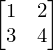

In [7]:
M = Matrix([[1,2],[3,4]])
M

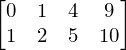

In [8]:
i, j = symbols('i, j') 

def f(i, j):
    return i**2+j**2

M1 = Matrix(2, 4, f)
M1

In [9]:
print('Cols and Rows of M1 matrix are {} and {}'.format(M1.cols, M1.rows))
print('the second element of row 0 is {}'.format(M1[0, 2]))

Cols and Rows of M1 matrix are 4 and 2
the second element of row 0 is 4


In [10]:
M1[2]

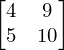

In [11]:
M1[:,2:4]

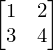

In [12]:
a = [1, 2, 3, 4]
M2 = Matrix(2, 2, a)
M2

* identity matrix

In [18]:
I = eye(3)
I

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

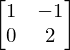

In [14]:
N = Matrix([[1, -1], [0, 2]])
N

* matrix multiplication

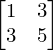

In [15]:
M2*N

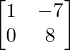

In [16]:
N**3

* List comprehension to create new matrix 

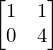

In [17]:
Matrix(2, 2, [i*i for i in N])

## 1.3 Linear algebra

* transpose of a matrix

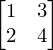

In [18]:
transpose(M2)

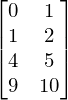

In [19]:
transpose(M1)

* rank of a matrix

In [20]:
# rank of a matrix
I.rank()

In [21]:
# determinant of a matrix
I.det()

In [22]:
M2.rank()

In [23]:
M2.det()

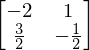

In [24]:
M2.inv()

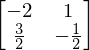

In [25]:
M2**-1

* eigenvalues

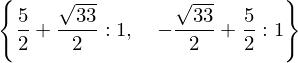

In [26]:
evals = M2.eigenvals()
evals

In [27]:
evals.values()

dict_values([1, 1])

## 2 Exercises


### 2.1 Vector manipulation
* Q 2.1.1 - Define the two vectors
$$c = \begin{bmatrix} 
  \sin(\theta)\cos(\phi) \\
  \sin(\theta)\sin(\phi)\\
  \cos(\theta)
\end{bmatrix}
, 
o = \begin{bmatrix} 
  -\cos(\theta)\cos(\phi) \\
  -\cos(\theta)\sin(\phi)\\
  \sin(\theta)
\end{bmatrix}$$

In [20]:
t,a = symbols('t,a')


In [56]:
c = [sin(t)*cos(a),sin(t)*sin(a), cos(t)]

In [57]:
o = [-cos(t)*cos(a), -cos(t)*sin(a),sin(t)]




In [58]:

res =np.dot(o,c)
res.trigsimp()


* Q 2.1.2 - Prove that these vectors are orthogonal 

In [75]:
res =np.dot(o,c)
res.trigsimp()


* Q2.1.3 - prove that their norm is 1

In [60]:
an = sqrt(np.dot(o,o))
print(an.simplify())          

1


In [61]:

an = sqrt(np.dot(c,c))
print(an.simplify())

1


* Q2.1.3 - Compute the third vector $b$ that is orthogonal to both $o$ and $c$

In [62]:
b = np.cross(c,o)
b

array([sin(a)*sin(t)**2 + sin(a)*cos(t)**2,
       -sin(t)**2*cos(a) - cos(a)*cos(t)**2, 0], dtype=object)

### 2.2 Basic matrices computation

Consider the following matrices:
$$
A = \begin{bmatrix} 
  -3 & 2 \\
   0 & 4\\
   1 & -1
\end{bmatrix}
, 
B = \begin{bmatrix} 
  1 & 2 \\
  0 & 1 \\
  1 & 1
\end{bmatrix}
$$
* Q 2.2.1 - Find a matrix $C$ such that $A-2B-C=0$
* Q 2.2.2 - Find a matrix $D$ such that $A+B+C+4D =0$

In [ ]:
A = Matrix([[-3,2], [0,4], [1, -1]])
B = Matrix([[1, 2], [0,1], [1,1]])

### 2.3 Linear system 
Find the following linear system by first using solve and then using matrix representation.

$$
  \begin{cases}
    x_1 + 2x_2 + 3x_3 + 4x_4 &= 25,\\
    -x_2 + x_3 -x_4 &= 5,\\
    x_1 + 2x_2+ 2x_3 &= 20, \\
    2x_1 + 3x_3 &= 19
  \end{cases}
$$



In [6]:
x1,x2,x3,x4 = symbols ('x1,x2,x3,x4')

In [7]:
A = Matrix([[1, 2, 3, 4],[0, -1, 1, -1],[1, 2, 2, 0], [2, 0, 3, 0]])
A


⎡1  2   3  4 ⎤
⎢            ⎥
⎢0  -1  1  -1⎥
⎢            ⎥
⎢1  2   2  0 ⎥
⎢            ⎥
⎣2  0   3  0 ⎦

In [9]:
B = Matrix([[25], [5], [20], [19]])
B

⎡25⎤
⎢  ⎥
⎢5 ⎥
⎢  ⎥
⎢20⎥
⎢  ⎥
⎣19⎦

In [63]:
A.solve_least_squares(B)

⎡ -2 ⎤
⎢    ⎥
⎢10/3⎥
⎢    ⎥
⎢23/3⎥
⎢    ⎥
⎣-2/3⎦

In [64]:
A.QRsolve(B)

⎡ -2 ⎤
⎢    ⎥
⎢10/3⎥
⎢    ⎥
⎢23/3⎥
⎢    ⎥
⎣-2/3⎦

In [14]:
X = A.inv()*B
X

⎡ -2 ⎤
⎢    ⎥
⎢10/3⎥
⎢    ⎥
⎢23/3⎥
⎢    ⎥
⎣-2/3⎦

 2.4 Commuting matrices 
In linear algebra, two matrices $A$ and $B$ are said to commute if $A.B = B.A$ and equivalently their commutator $A.B - B.A = 0$.
Find all the matrices that when commutes with matrix 
$A = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 5
\end{bmatrix}
$
can be writen in the form of:
$$
B = \begin{bmatrix}
k_1  & 0 & 0 \\
0 & k_2 & 0 \\
0 & 0 & k_3
\end{bmatrix} , k_1, k_2, k_3 \in \rm I\!R
$$


### 2.5 Invertible matrix
For which values of $t$ the following matrix is not invertible: 
$$ A = 
\begin{bmatrix}
t+3 & -1 & 1\\
5 & t-3 & 2\\
6 & -6 & t+4 \\ 
\end{bmatrix}
$$

In [66]:
t = symbols('t')
A = Matrix([[t+3, -1, 1], [5, t-3, 2], [6, -6, t+4 ]])
A.det()


In [67]:
solve(A.det(),t)

### 2.6 Pseudo inverse of matrix

The pseudo-inverse of a $m\times n$ matrix $A$ is a generalization of a inverse matrix.
For an overdetermined set of linear equations represented by its matrix $A$ (with $m \ge n$),
if A is full column rank, meaning $rank(A) = n \le m$. Therefore, $A^{T}.A$ is not singular and the pseudo-inverse $A^{\dagger}$ is a left inverse of $A$, in the sense that $A^{\dagger}.A = In$
In this case we have the closed-form expresson $A^{\dagger} = (A^{T}. A)^{-1}.A^{T}$.
The solution to the least-squares problem $min_{x} \Vert Ax-y\Vert$, where the minimum norm is $x^{\ast} = A^{\dagger}.y$

Now consider the following linear systems, find the solution using least-square method:

$$
  \begin{cases}
    x+z & = 1.5\\
    x-y & =2.1\\
    x-z & = 0.8\\
    x+y & = 0.6
  \end{cases}
$$

In [68]:
x,y,z = symbols ('x,y,z')


In [69]:
N = Matrix([[1,0,1],[1,-1,0], [1,0,-1],[1,1,0]])
M = Matrix([[1.5],[2.1],[0.8], [0.6]])

In [73]:
(N.transpose()*N).inv()*N.transpose()*M

⎡1.25 ⎤
⎢     ⎥
⎢-0.75⎥
⎢     ⎥
⎣0.35 ⎦

In [74]:
N.solve_least_squares(M)

⎡1.25 ⎤
⎢     ⎥
⎢-0.75⎥
⎢     ⎥
⎣0.35 ⎦